In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('dark_background')

In [2]:
df=pd.read_csv('probe.csv')
df.head()

,t,x,y,z,prank,etype,uidx,eidx,rho,u,v,w,p
0,3.211295e-07,0.129677,0.000068,0.04984,14,pri,4,1439,1.0923,46.226949,4.279629e-11,-9.923974e-13,89769.0
1,8.815134e-07,0.129677,0.000068,0.04984,14,pri,4,1439,1.0923,46.226949,4.869202e-11,-1.122913e-11,89769.0
2,1.647040e-06,0.129677,0.000068,0.04984,14,pri,4,1439,1.0923,46.226949,5.807815e-11,-2.223040e-11,89769.0
3,2.668280e-06,0.129677,0.000068,0.04984,14,pri,4,1439,1.0923,46.226949,6.084827e-11,-3.707606e-11,89769.0
4,4.028759e-06,0.129677,0.000068,0.04984,14,pri,4,1439,1.0923,46.226949,6.188746e-11,-5.721957e-11,89769.0


In [19]:
df.dtypes

t        float64
x        float64
y        float64
z        float64
prank      int64
etype     object
uidx       int64
eidx       int64
rho      float64
u        float64
v        float64
w        float64
p        float64
dtype: object

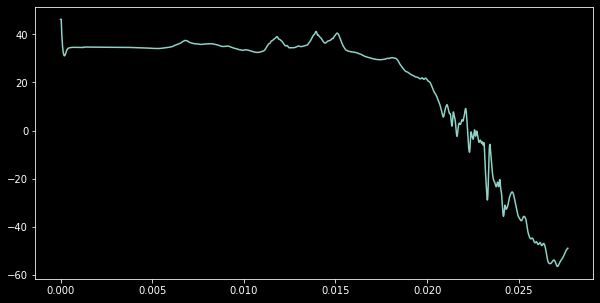

In [3]:
plt.figure(figsize=(10,5))
plt.plot(df.t,df.u)

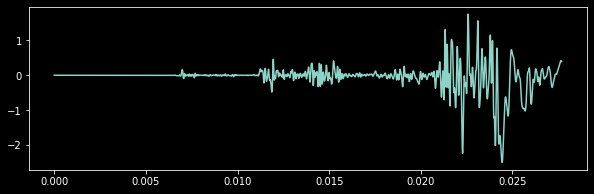

In [4]:
plt.figure(figsize=(10,3))
plt.plot(df.t,df.v)

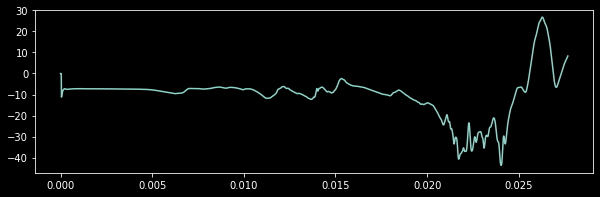

In [5]:
plt.figure(figsize=(10,3))
plt.plot(df.t,df.w)

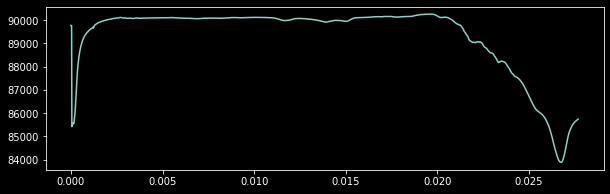

In [6]:
plt.figure(figsize=(10,3))
plt.plot(df.t,df.p)

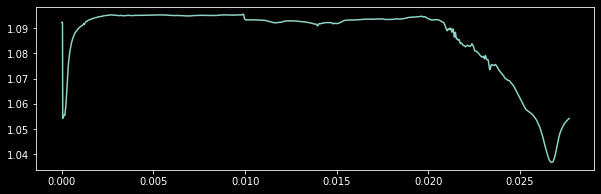

In [7]:
plt.figure(figsize=(10,3))
plt.plot(df.t,df.rho)

In [33]:
df.shape

(3802, 13)

## Univariate prediction

In [8]:
# take 10 time steps and try to predict the 11th time step output
def df_to_x_y(df,window_size=10):
    df_as_np=df.to_numpy()
    X=[]
    y=[]
    for i in range(len(df_as_np)-window_size):
        inpt = [[u] for u in df_as_np[i:i+window_size]]
        X.append(inpt)
        outpt = df_as_np[i+window_size]
        y.append(outpt)
    return np.array(X),np.array(y)

In [9]:
ws=10
Uin,Uout = df_to_x_y(df['u'],ws)

In [12]:
x_train,y_train = Uin[:3000],Uout[:3000]
x_val,y_val = Uin[3000:3350],Uout[3000:3350]
x_test,y_test = Uin[3350:],Uout[3350:]

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [93]:
model = Sequential()
model.add(InputLayer((ws,1)))
model.add(LSTM(64))
model.add(Dense(16,'relu'))
model.add(Dense(1,'linear'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 64)                16896     
                                                                 
 dense_18 (Dense)            (None, 16)                1040      
                                                                 
 dense_19 (Dense)            (None, 1)                 17        
                                                                 
Total params: 17,953
Trainable params: 17,953
Non-trainable params: 0
_________________________________________________________________


In [94]:
cp = ModelCheckpoint('model1/',save_best_only=True)
model.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate=0.0001),metrics=[RootMeanSquaredError()])

In [95]:
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, callbacks=[cp])

Epoch 1/10
85/94 [==========================>...] - ETA: 0s - loss: 1040.6626 - root_mean_squared_error: 32.2593

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 5s 34ms/step - loss: 1035.0168 - root_mean_squared_error: 32.1717 - val_loss: 324.7975 - val_root_mean_squared_error: 18.0221
Epoch 2/10
92/94 [============================>.] - ETA: 0s - loss: 951.5058 - root_mean_squared_error: 30.8465

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 32ms/step - loss: 950.0953 - root_mean_squared_error: 30.8236 - val_loss: 320.9862 - val_root_mean_squared_error: 17.9161
Epoch 3/10
80/94 [========================>.....] - ETA: 0s - loss: 815.0953 - root_mean_squared_error: 28.5499

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 36ms/step - loss: 797.2963 - root_mean_squared_error: 28.2364 - val_loss: 319.6644 - val_root_mean_squared_error: 17.8792
Epoch 4/10
92/94 [============================>.] - ETA: 0s - loss: 551.8615 - root_mean_squared_error: 23.4917

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 31ms/step - loss: 550.2621 - root_mean_squared_error: 23.4577 - val_loss: 315.4056 - val_root_mean_squared_error: 17.7597
Epoch 5/10
84/94 [=========================>....] - ETA: 0s - loss: 371.4687 - root_mean_squared_error: 19.2735

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 4s 39ms/step - loss: 364.6367 - root_mean_squared_error: 19.0955 - val_loss: 310.7203 - val_root_mean_squared_error: 17.6273
Epoch 6/10
86/94 [==========================>...] - ETA: 0s - loss: 252.7940 - root_mean_squared_error: 15.8995

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 4s 38ms/step - loss: 248.2028 - root_mean_squared_error: 15.7545 - val_loss: 309.2537 - val_root_mean_squared_error: 17.5856
Epoch 7/10
80/94 [========================>.....] - ETA: 0s - loss: 174.4239 - root_mean_squared_error: 13.2070

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 4s 39ms/step - loss: 169.8948 - root_mean_squared_error: 13.0344 - val_loss: 308.7601 - val_root_mean_squared_error: 17.5716
Epoch 8/10
91/94 [============================>.] - ETA: 0s - loss: 119.6697 - root_mean_squared_error: 10.9394

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 37ms/step - loss: 118.7496 - root_mean_squared_error: 10.8972 - val_loss: 308.4362 - val_root_mean_squared_error: 17.5624
Epoch 9/10
89/94 [===========================>..] - ETA: 0s - loss: 80.1308 - root_mean_squared_error: 8.9516

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 35ms/step - loss: 79.3654 - root_mean_squared_error: 8.9087 - val_loss: 307.4427 - val_root_mean_squared_error: 17.5340
Epoch 10/10
94/94 [==============================] - ETA: 0s - loss: 51.3108 - root_mean_squared_error: 7.1632

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 4s 41ms/step - loss: 51.3108 - root_mean_squared_error: 7.1632 - val_loss: 307.4346 - val_root_mean_squared_error: 17.5338


In [96]:
from tensorflow.keras.models import load_model
final_model = load_model('model1/')

In [97]:
train=final_model.predict(x_train)#.flatten()
val=final_model.predict(x_val)#.flatten()
test=final_model.predict(x_test)#.flatten()

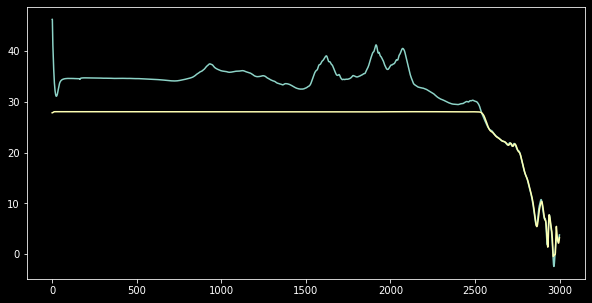

In [98]:
plt.figure(figsize=(10,5))
plt.plot(y_train)
plt.plot(train)

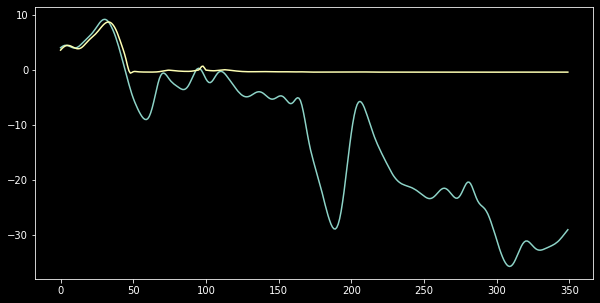

In [99]:
plt.figure(figsize=(10,5))
plt.plot(y_val)
plt.plot(val)

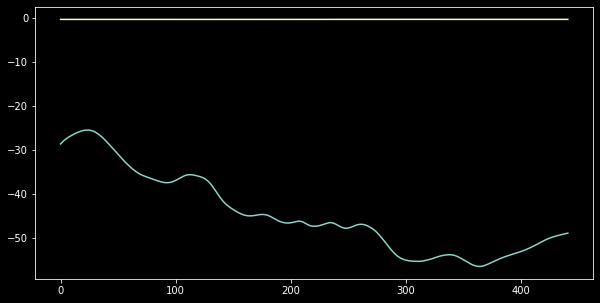

In [100]:
plt.figure(figsize=(10,5))
plt.plot(y_test)
plt.plot(test)

### Scaled velocity

In [101]:
# min-max scaling
df['U_scaled']=(df.u-df.u.min())/(df.u.max()-df.u.min())
ws=10
inU,outU = df_to_x_y(df['U_scaled'],ws)

In [102]:
u_train,y_train = inU[:3000],outU[:3000]
u_val,y_val = inU[3000:3350],outU[3000:3350]
u_test,y_test = inU[3350:],outU[3350:]

In [103]:
model.fit(u_train, y_train, validation_data=(u_val, y_val), epochs=10, callbacks=[cp])

Epoch 1/10
93/94 [============================>.] - ETA: 0s - loss: 0.0012 - root_mean_squared_error: 0.0342

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 4s 40ms/step - loss: 0.0012 - root_mean_squared_error: 0.0340 - val_loss: 0.0080 - val_root_mean_squared_error: 0.0892
Epoch 2/10
89/94 [===========================>..] - ETA: 0s - loss: 3.8200e-04 - root_mean_squared_error: 0.0195

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 36ms/step - loss: 3.8203e-04 - root_mean_squared_error: 0.0195 - val_loss: 0.0072 - val_root_mean_squared_error: 0.0850
Epoch 3/10
81/94 [========================>.....] - ETA: 0s - loss: 3.5719e-04 - root_mean_squared_error: 0.0189

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 4s 40ms/step - loss: 3.5192e-04 - root_mean_squared_error: 0.0188 - val_loss: 0.0065 - val_root_mean_squared_error: 0.0805
Epoch 4/10
87/94 [==========================>...] - ETA: 0s - loss: 3.1951e-04 - root_mean_squared_error: 0.0179

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 36ms/step - loss: 3.2190e-04 - root_mean_squared_error: 0.0179 - val_loss: 0.0058 - val_root_mean_squared_error: 0.0760
Epoch 5/10
93/94 [============================>.] - ETA: 0s - loss: 2.9048e-04 - root_mean_squared_error: 0.0170

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 36ms/step - loss: 2.9085e-04 - root_mean_squared_error: 0.0171 - val_loss: 0.0053 - val_root_mean_squared_error: 0.0725
Epoch 6/10
85/94 [==========================>...] - ETA: 0s - loss: 2.7356e-04 - root_mean_squared_error: 0.0165

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 4s 39ms/step - loss: 2.6182e-04 - root_mean_squared_error: 0.0162 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0699
Epoch 7/10
89/94 [===========================>..] - ETA: 0s - loss: 2.3595e-04 - root_mean_squared_error: 0.0154

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 34ms/step - loss: 2.3452e-04 - root_mean_squared_error: 0.0153 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0637
Epoch 8/10
92/94 [============================>.] - ETA: 0s - loss: 2.0942e-04 - root_mean_squared_error: 0.0145

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 4s 42ms/step - loss: 2.0825e-04 - root_mean_squared_error: 0.0144 - val_loss: 0.0035 - val_root_mean_squared_error: 0.0590
Epoch 9/10
92/94 [============================>.] - ETA: 0s - loss: 1.8582e-04 - root_mean_squared_error: 0.0136

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 3s 35ms/step - loss: 1.8391e-04 - root_mean_squared_error: 0.0136 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0554
Epoch 10/10
93/94 [============================>.] - ETA: 0s - loss: 1.6259e-04 - root_mean_squared_error: 0.0128

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


94/94 [==============================] - 4s 39ms/step - loss: 1.6230e-04 - root_mean_squared_error: 0.0127 - val_loss: 0.0026 - val_root_mean_squared_error: 0.0506


In [104]:
final_model = load_model('model1/')
train=final_model.predict(u_train)
val=final_model.predict(u_val)
test=final_model.predict(u_test)

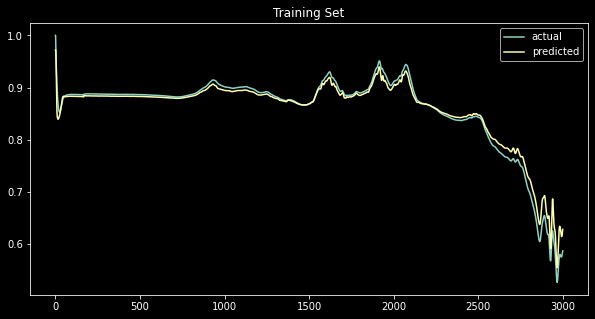

In [110]:
plt.figure(figsize=(10,5))
plt.plot(y_train,label='actual')
plt.plot(train,label='predicted')
plt.title('Training Set')
plt.legend()

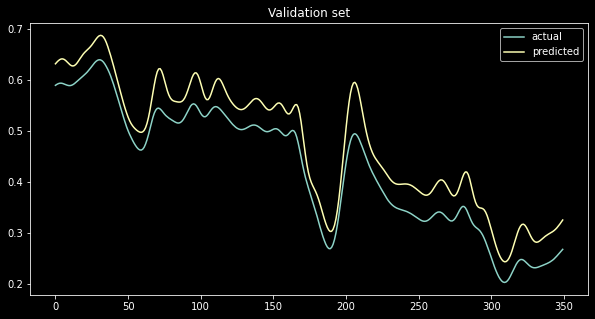

In [111]:
plt.figure(figsize=(10,5))
plt.plot(y_val,label='actual')
plt.plot(val,label='predicted')
plt.title('Validation set')
plt.legend()

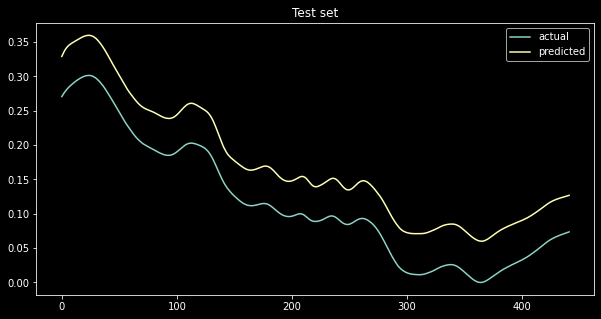

In [113]:
plt.figure(figsize=(10,5))
plt.plot(y_test,label='actual')
plt.plot(test,label='predicted')
plt.title('Test set')
plt.legend()